In [21]:
import json
import matplotlib.pyplot as plt

In [4]:
file_name = "cnn_simclr_results.json"
with open(file_name, 'r') as f:
    results = json.load(f)

In [5]:
results

{'n_patients=3': {'sup_res': {'test': 0.5652250051498413,
   'val': 0.7026578187942505},
  'logistic_res': {'test': 0.6440268754959106, 'val': 0.7906976938247681},
  'fully_tuned_res': {'test': 0.6432920694351196, 'val': 0.8139534592628479}},
 'n_patients=5': {'sup_res': {'test': 0.6246616244316101,
   'val': 0.7634854912757874},
  'logistic_res': {'test': 0.6614145636558533, 'val': 0.7769709825515747},
  'fully_tuned_res': {'test': 0.6669674515724182, 'val': 0.8215767741203308}},
 'n_patients=10': {'sup_res': {'test': 0.6353001594543457,
   'val': 0.7038759589195251},
  'logistic_res': {'test': 0.6854979991912842, 'val': 0.7715762257575989},
  'fully_tuned_res': {'test': 0.6927919983863831, 'val': 0.788630485534668}},
 'n_patients=20': {'sup_res': {'test': 0.6983763575553894,
   'val': 0.7392351031303406},
  'logistic_res': {'test': 0.7158593535423279, 'val': 0.749933123588562},
  'fully_tuned_res': {'test': 0.719194233417511, 'val': 0.7715966701507568}},
 'n_patients=50': {'sup_res':

In [13]:
patient_list = [int(x.split("=")[1]) for x in results.keys()]

In [24]:
sup_test_acc = [x['sup_res']['test'] for x in results.values()]
log_test_acc = [x['logistic_res']['test'] for x in results.values()]
tuned_test_acc = [x['fully_tuned_res']['test'] for x in results.values()]

In [37]:
import matplotlib
matplotlib.rcParams['font.size']

10.0

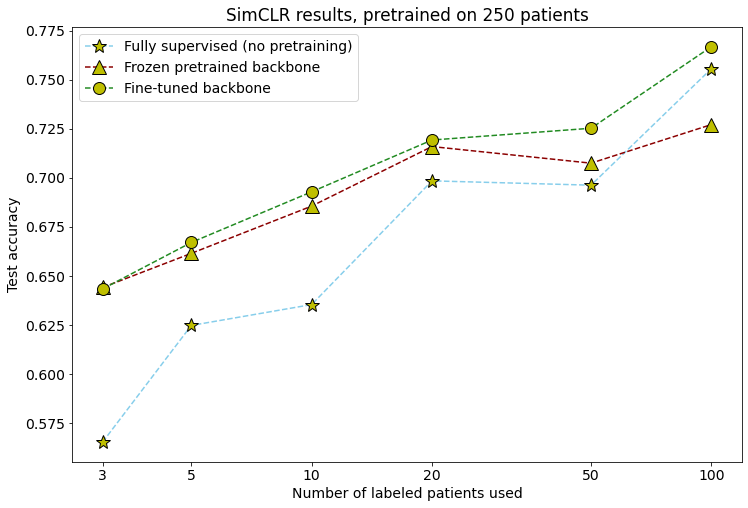

In [41]:
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(12,8))
plt.plot(patient_list, sup_test_acc, '--', color="skyblue", marker="*", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patient_list, log_test_acc, '--', color="darkred", marker="^", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patient_list, tuned_test_acc, '--', color="forestgreen", marker="o", markeredgecolor="#000", markerfacecolor="y", markersize=12)
plt.xscale("log")
plt.xticks(patient_list, labels=patient_list)
plt.title("SimCLR results, pretrained on 250 patients")
plt.xlabel("Number of labeled patients used")
plt.ylabel("Test accuracy")
plt.minorticks_off()
plt.legend(["Fully supervised (no pretraining)", "Frozen pretrained backbone", "Fine-tuned backbone"])
plt.savefig('simclr_graph.png', facecolor="white")
plt.show()